In [1]:

import ot
import numpy as np
import pandas as pd


import torch
import torch.nn as nn
import torch.optim as optim

import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
from scipy.spatial.distance import cdist, pdist, squareform

# Check relation between image and text in news

In [3]:
import os

In [4]:
embedding_path = '/data/dahn017/KDD23/datasets/politifact/'

In [5]:
df = pd.read_csv(f"{embedding_path}/politifact_total.csv")

In [6]:
embedding_path = '/data/dahn017/KDD23/datasets/politifact/'

text_embed = np.load(f'{embedding_path}/pretrained/text_clip_embeds.npy')
img_embed = np.load(f'{embedding_path}/pretrained/img_clip_embeds.npy')
print(text_embed.shape, img_embed.shape)

In [8]:
sim = text_embed @ img_embed.T / np.sqrt(text_embed ** 2).sum() * np.sqrt(img_embed ** 2).sum()

In [9]:
sim2 = np.diagonal(sim)

In [10]:
# Find the index of maximum values
max_index = np.unravel_index(np.argmax(sim2, axis=None), sim2.shape)

In [11]:
# Find the sorted indices 
indices = np.unravel_index(np.argsort(sim2, axis=None), sim2.shape)

In [12]:
high_news = indices[0][5000:5010]
low_news = indices[0][:10]
# x = indices[0][-30:]
# y = indices[1][-30:]

# x1 = indices[0][:30]
# y1 = indices[1][:30]

In [13]:
for i in high_news:
    tmp = df.iloc[i]
    title = tmp.headline
    filename= tmp.filename
    label = tmp['category']
    image = Image.open(filename)
    display(image)
    print(title, label, sim[i, i])

In [14]:
for i in low_news:
    tmp = df.iloc[i]
    title = tmp.headline
    filename= tmp.filename
    label = tmp['category']
    print(filename)
    # image = Image.open(filename)
    # display(image)
    print(title, label, sim[i, i])

AttributeError: 'Series' object has no attribute 'headline'

In [65]:
sim

array([[0.        , 0.        , 0.20192111, ..., 0.16819884, 0.        ,
        0.12776786],
       [0.        , 0.        , 0.14893609, ..., 0.16024031, 0.        ,
        0.10009511],
       [0.        , 0.        , 0.17265477, ..., 0.17011665, 0.        ,
        0.11103788],
       ...,
       [0.        , 0.        , 0.17041468, ..., 0.16595594, 0.        ,
        0.15115946],
       [0.        , 0.        , 0.15027028, ..., 0.17667382, 0.        ,
        0.12324136],
       [0.        , 0.        , 0.16315966, ..., 0.14516342, 0.        ,
        0.2118992 ]])

<AxesSubplot: >

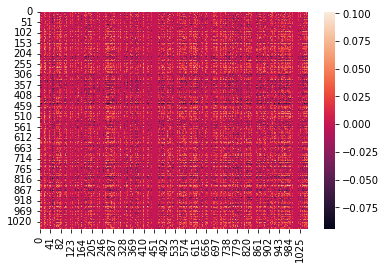

In [16]:
sns.heatmap(sim)

<AxesSubplot: >

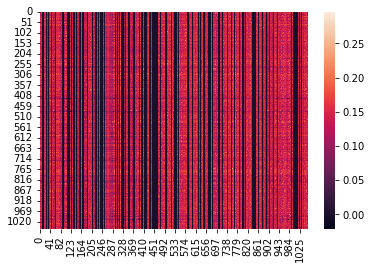

In [12]:
sns.heatmap(sim)

In [ ]:
sns.heatmap(sim)

# Similarity and Labels

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
sim.shape

(1056, 1056)

In [20]:
labels = df['Label'].values

In [21]:
sim2 = np.diagonal(sim)

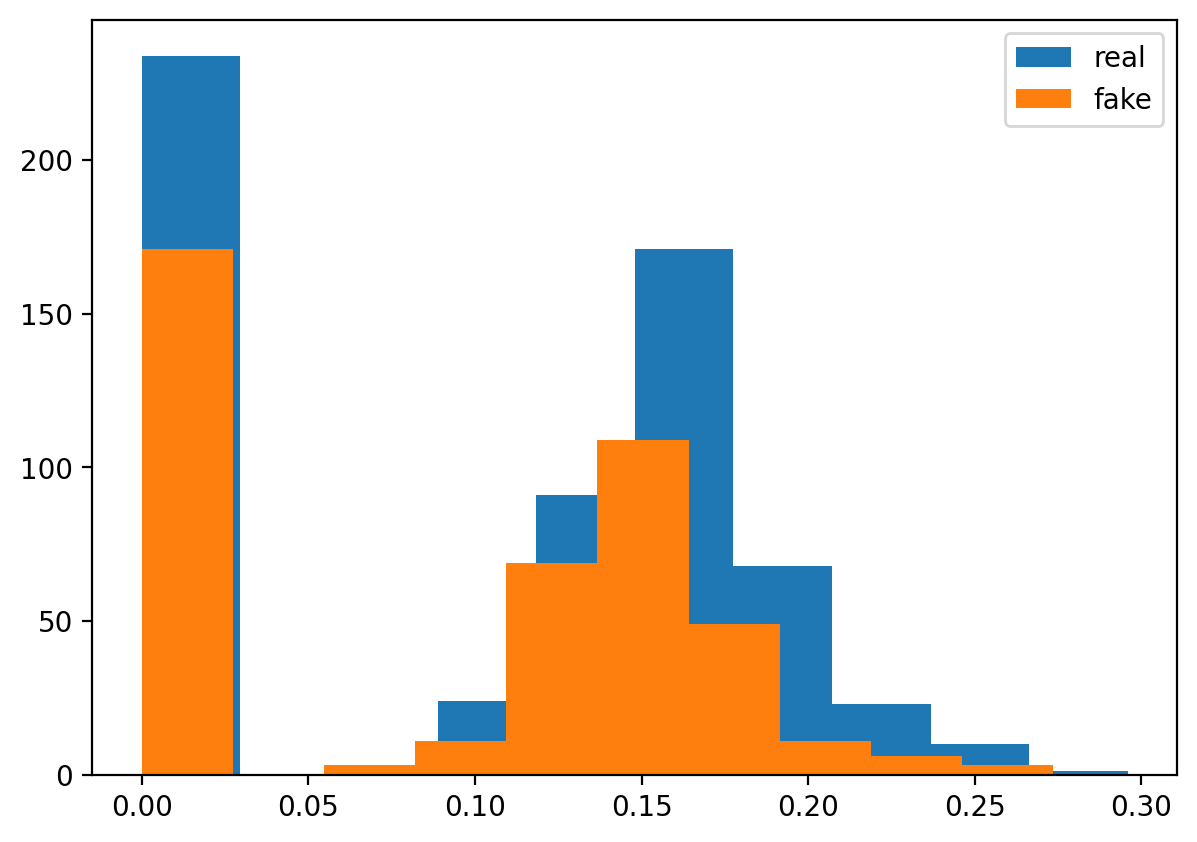

In [24]:
fake = np.where(labels == 1)
real = np.where(labels == 0)

plt.figure(figsize=(7, 5), dpi=200)
plt.hist(sim2[real], label='real')
plt.hist(sim2[fake], label = 'fake')
plt.legend()

# Unimodal pretrained models

In [13]:
text_embed = np.load(f'{embedding_path}/pretrained/text_sbert_embeds.npy')
img_embed = np.load(f'{embedding_path}/pretrained/img_vit_embeds.npy')
print(text_embed.shape, img_embed.shape)

(1056, 768) (1056, 768)


In [14]:
text_embed = np.nan_to_num(text_embed)
img_embed = np.nan_to_num(img_embed)

In [15]:
sim = text_embed @ img_embed.T / np.sqrt(text_embed ** 2).sum() * np.sqrt(img_embed ** 2).sum()

In [28]:
sim3 = np.diagonal(sim)

In [29]:
# Find the index of maximum values
max_index = np.unravel_index(np.argmax(sim3, axis=None), sim3.shape)

In [30]:
# Find the sorted indices 
indices = np.unravel_index(np.argsort(sim3, axis=None), sim3.shape)

In [31]:
high_news = indices[0][-10:]
low_news = indices[0][:10]

# x = indices[0][-30:]
# y = indices[1][-30:]

# x1 = indices[0][:10]
# y1 = indices[1][:10]

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
np.mean(sim2)

In [34]:
np.mean(sim3)

0.002085517968913976

In [35]:
np.std(sim2)

0.080587086240201

In [36]:
np.std(sim3)

0.018320958569132382

In [37]:
sim4 = (np.mean(sim2) - sim3) / (np.std(sim2) * 10)

In [38]:
sim2

array([0.        , 0.        , 0.17265477, ..., 0.16595594, 0.        ,
       0.2118992 ])

In [39]:
sim4

array([0.12086615, 0.12086615, 0.11808579, ..., 0.09788512, 0.12086615,
       0.13188584])

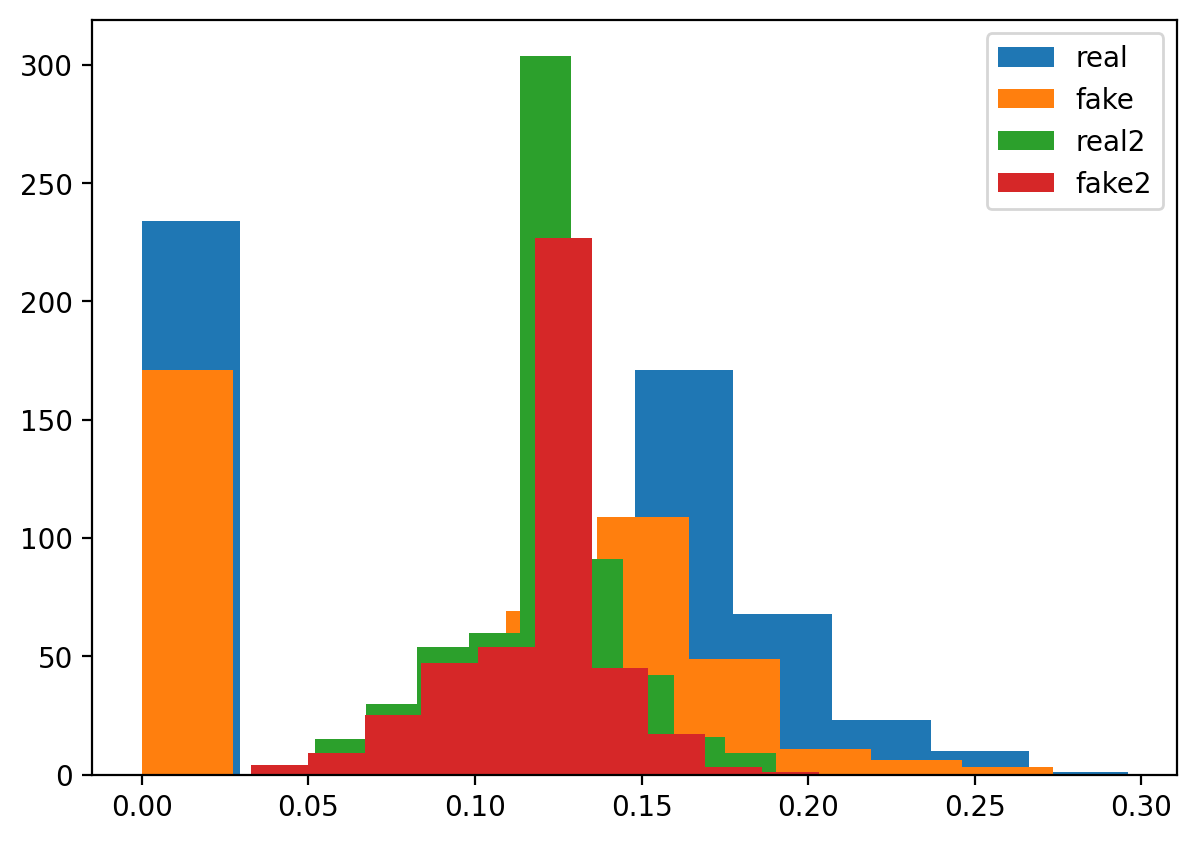

In [40]:
plt.figure(figsize=(7, 5), dpi=200)
plt.hist(sim2[real], label='real')
plt.hist(sim2[fake], label = 'fake')
plt.hist(sim4[real], label='real2')
plt.hist(sim4[fake], label = 'fake2')
plt.legend()

In [33]:
np.mean(sim2)

In [33]:
np.mean(sim2)